In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Question 1

First I will assign physical constants in the units that match those in the given problem. 

In [2]:
h = 6.626e-14   #Planck's Constant [kg * Angstrom^2 s^-1]
c = 3e18         #Speed of light [Angstrom/s]
k = 1.38e-3        #Boltzmann's Constant [Angstrom^2 kg s^-2 K^-1]

Next I assigned effective temperatures

In [3]:
T1 = 3000   #Effective Temperature in [K]
T2 = 6000   #Effective Temperature in [K]
T3 = 9000   #Effective Temperature in [K]

To be able to plot the planck distribution I made a function that takes a wavelength value [Angstrom] and a temperature value [Kelvin]

In [4]:
def planck(wl,T):   #Planck Function (wavelength ver.)
    return(((2 * h * c**2) / (wl**5)) / (np.exp((h * c) / (wl * k * T)) - 1))

I also created a linspace with values for the wavelengths between 1000 and 20000 angstrom.

In [5]:
wl = np.linspace(1000,20000,20000)  #lin space for wavelengths between 1000 and 20000 angstrom.

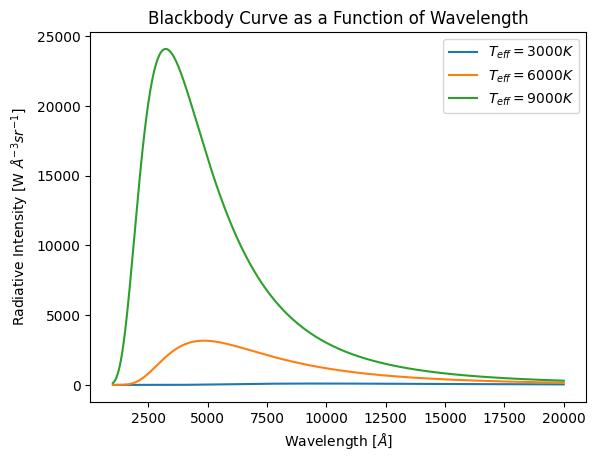

In [6]:
fig,axs = plt.subplots()
plt.plot(wl,planck(wl,T1),label = '$T_{eff} = 3000K$')
plt.plot(wl,planck(wl,T2),label = '$T_{eff} = 6000K$')
plt.plot(wl,planck(wl,T3),label = '$T_{eff} = 9000K$')
axs.set_title('Blackbody Curve as a Function of Wavelength')
axs.set_xlabel(r'Wavelength [$\AA$]')
axs.set_ylabel(r"Radiative Intensity [W $\AA^{-3} sr^{-1}$]")
plt.legend()
plt.savefig('Basic BB plot.png')

This plot is expected, but I figured it would be easier to see the differences between the curves if I normalized each one.

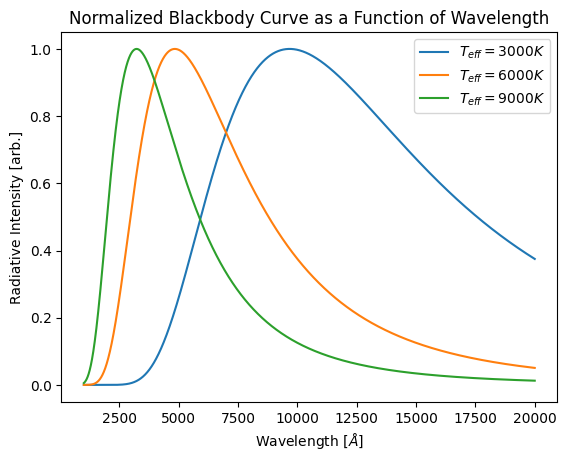

In [7]:
fig,axs = plt.subplots()
plt.plot(wl,planck(wl,T1)/max(planck(wl,T1)),label = '$T_{eff} = 3000K$')
plt.plot(wl,planck(wl,T2)/max(planck(wl,T2)),label = '$T_{eff} = 6000K$')
plt.plot(wl,planck(wl,T3)/max(planck(wl,T3)),label = '$T_{eff} = 9000K$')
axs.set_title('Normalized Blackbody Curve as a Function of Wavelength')
axs.set_xlabel(r'Wavelength [$\AA$]')
axs.set_ylabel(r"Radiative Intensity [arb.]")
plt.legend()
plt.savefig('Normalized BB plot.png')

From here I made another function that will return the values of the derivative of the planck funciton. To accomplish this I used the limit definition of a derivative and set the small change,h, to be very small

In [8]:
#Derivative of Planck's Function using the limit definition of a derivative. We are not really taking a limit here but we can set h to be really small which gives
#a good approximation to the value of the derivative.

def derivative(wl,T,h=10e-6):
    return((planck(wl + h , T) - planck(wl,T)) / h)

I created a new linspace to match the required one in the question. I plotted each derivative separately and found which values were the closest to zero: maximum of the original function.

In [9]:
Dirwl = np.linspace(2000,10000,10000)   #New lin space for wavelengths between 2000 and 10000 Angstrom.

[9670.3670367]


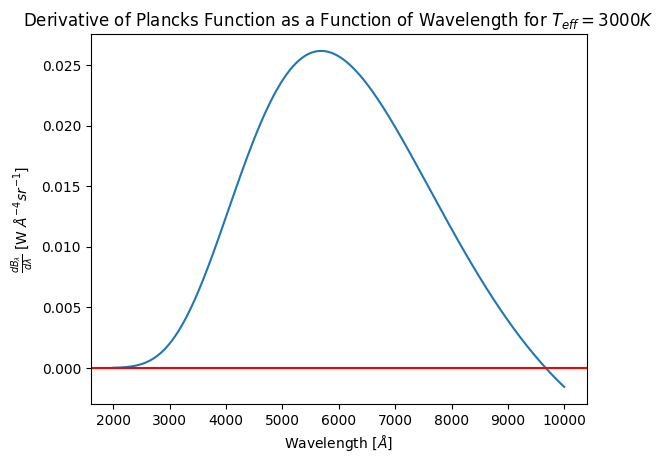

In [10]:
#Plot of the derivative of planck's function for T_eff = 3000K. I find the peak wavelengths by finding where this function = 0. This is denoted with a red line
#on the plot, but I found the actual value by finding the wavelength where the function is inbetween -0.000001 and 0.000001. This returns the wavelength value that
#is closest to zero, being the peak wavelength.


fig,axs = plt.subplots()
plt.plot(Dirwl,derivative(Dirwl,T1))
plt.axhline(y=0,color = 'r')
plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel(r'$\frac{dB_\lambda}{d\lambda}$ [W $\AA^{-4} sr^{-1}$]')
plt.title(r'Derivative of Plancks Function as a Function of Wavelength for $T_{eff} = 3000K $')
plt.savefig('DirBB3000')
print(Dirwl[(derivative(Dirwl,T1) > -0.000001) & (derivative(Dirwl,T1) < 0.000001)])

[4833.88338834 4834.68346835 4835.48354835 4836.28362836]


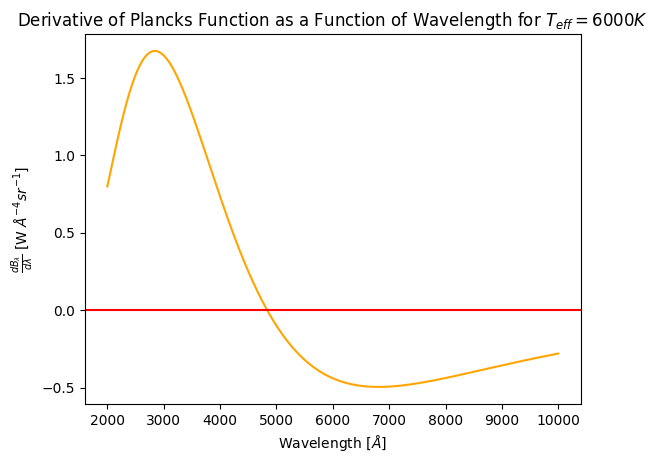

In [11]:
#Plot of the derivative of planck's function for T_eff = 6000K. I find the peak wavelengths by finding where this function = 0. This is denoted with a red line
#on the plot, but I found the actual value by finding the wavelength where the function is inbetween -0.001 and 0.001. This returns the wavelength value that
#is closest to zero, being the peak wavelength.

plt.plot(Dirwl,derivative(Dirwl,T2), color = 'orange')
plt.axhline(y=0,color = 'r')
plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel(r'$\frac{dB_\lambda}{d\lambda}$ [W $\AA^{-4} sr^{-1}$]')
plt.title(r'Derivative of Plancks Function as a Function of Wavelength for $T_{eff} = 6000K $')
plt.savefig('DirBB6000')
print(Dirwl[(derivative(Dirwl,T2) > -0.001) & (derivative(Dirwl,T2) < 0.001)])

[3223.32233223 3224.12241224]


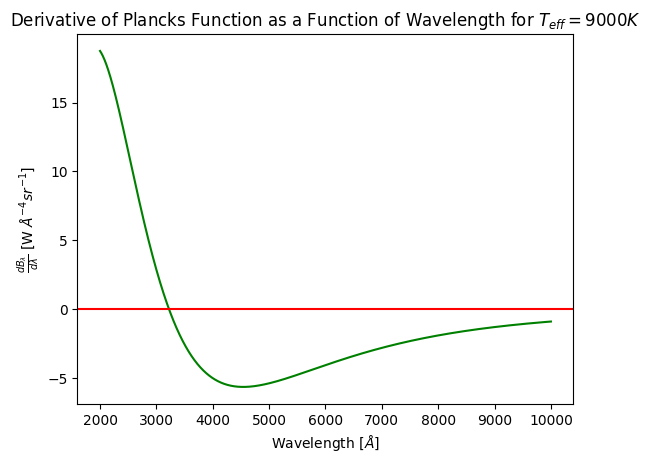

In [12]:
#Plot of the derivative of planck's function for T_eff = 9000K. I find the peak wavelengths by finding where this function = 0. This is denoted with a red line
#on the plot, but I found the actual value by finding the wavelength where the function is inbetween -0.01 and 0.01. This returns the wavelength value that
#is closest to zero, being the peak wavelength.
plt.plot(Dirwl,derivative(Dirwl,T3),color = 'green')
plt.axhline(y=0,color = 'r')
plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel(r'$\frac{dB_\lambda}{d\lambda}$ [W $\AA^{-4} sr^{-1}$]')
plt.title(r'Derivative of Plancks Function as a Function of Wavelength for $T_{eff} = 9000K $')
plt.savefig('DirBB9000')
print(Dirwl[(derivative(Dirwl,T3) > -0.01) & (derivative(Dirwl,T3) < 0.01)])

Now with the peak wavelengths I can make an inverse temperature plot vs wavelength to calculate my measured value of Wien's displacement constant.

Text(0.5, 1.0, 'Weins Law')

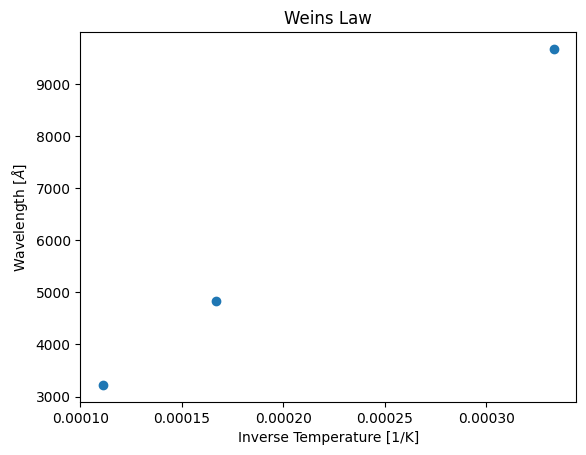

In [13]:
InvT = [1/T1 , 1/T2 , 1/T3] #list of inverse temperatures
MaxWl = [9670,4835,3223]    #list of peak wavelengths for each temerature

plt.scatter(InvT,MaxWl)
plt.xlabel(r'Inverse Temperature [1/K]')
plt.ylabel(r'Wavelength [$\AA$]')
plt.savefig('Weins')
plt.title('Weins Law')

In [14]:
#To fit these points with a line we chose a linear fit in the form of ax+b. Wein's law follows this form, so we will compare the optimal fit parameter 'a' with the
#the constant coefficent for Wein's law to see if our data matches.

def FitFunc(x,a,b):     
    return(a * x + b)

popt, pcov = curve_fit(FitFunc, InvT, MaxWl)    #Using the curve fit function to find optimal parameters for the fit.
print('The slope of the fitted line is:',popt[0],'with an intercept of',popt[1])

The slope of the fitted line is: 29011153.768677242 with an intercept of -0.34613467436184875


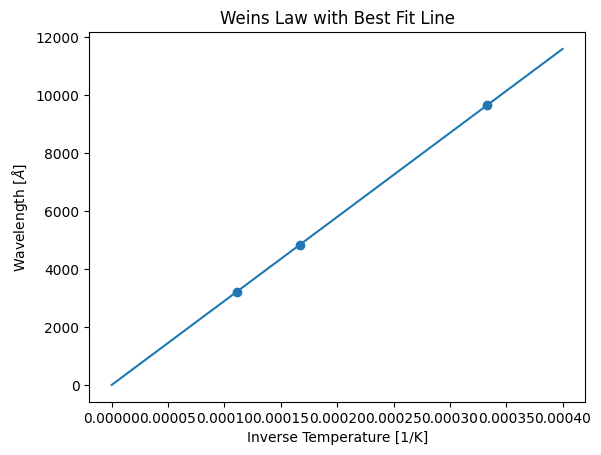

In [15]:
xlin = np.linspace(0,0.00040)
plt.scatter(InvT,MaxWl)
plt.plot(xlin,FitFunc(xlin,popt[0],popt[1]))
plt.xlabel(r'Inverse Temperature [1/K]')
plt.ylabel(r'Wavelength [$\AA$]')
plt.title('Weins Law with Best Fit Line')
plt.savefig('Fitted Weins')

## Question 2

In [16]:
star1 = np.genfromtxt('star1.txt',names = True)
star2 = np.genfromtxt('star2.txt',names=True)
star3 = np.genfromtxt('star3.txt',names=True)
# print(star1['Wavelength'])
# print(star1['Flux'])

In [17]:
h = 6.626e-14   #Planck's Constant [kg * Angstrom^2 s^-1]
c = 3e18         #Speed of light [Angstrom/s]
k = 1.38e-3        #Boltzmann's Constant [Angstrom^2 kg s^-2 K^-1]
T1 = 3000   #Effective Temperature in [K]
T2 = 6000   #Effective Temperature in [K]
T3 = 9000   #Effective Temperature in [K]

wl = np.linspace(1000,20000,20000)  #lin space for wavelengths between 1000 and 20000 angstrom.

def planck(wl,T):   #Planck Function (wavelength ver.)
    return(((2 * h * c**2) / (wl**5)) / (np.exp((h * c) / (wl * k * T)) - 1))

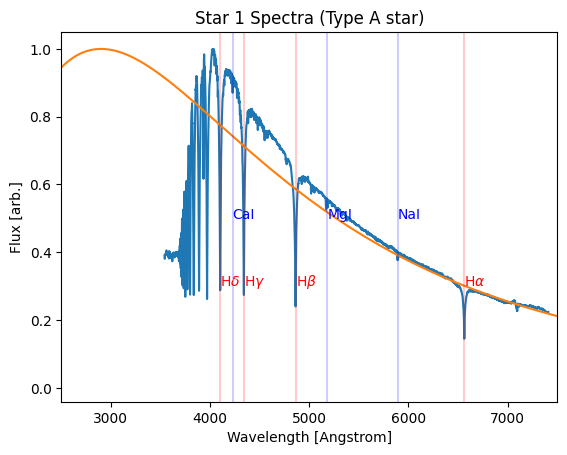

In [18]:
fig,axs = plt.subplots()
axs.plot(star1['Wavelength'],star1['Flux']/max(star1['Flux']))
plt.plot(wl,planck(wl,10000)/max(planck(wl,10000)),label = '$T_{eff} = 10000K$')
plt.axvline(x=4102.1,color='r',alpha = 0.2) # h (H_delta) absorption line 4101
plt.axvline(x=4226.7,color='b',alpha = 0.2) # CaI absorption line 4226
plt.axvline(x=4340.4,color='r',alpha = 0.2) # G' (H_gamma) absorption line 4340
plt.axvline(x=4861.7,color='r',alpha = 0.2) # F (H_beta) absorption line 4861
plt.axvline(x=5183.6,color='b',alpha = 0.2) # (b1,b2,b4) MgI absorption line 5183,5172,5167
plt.axvline(x=5895,color='b',alpha = 0.2) # D1 NaI absorption line 5895
plt.axvline(x=6562.7,color='r',alpha = 0.2) # C (H_alpha) absorption line 6562
plt.text(4102.1,0.3,r'H$\delta$',color = 'r')
plt.text(4340.4,0.3,r'H$\gamma$',color = 'r')
plt.text(4861.7,0.3,r'H$\beta$',color = 'r')
plt.text(6562.7,0.30,r'H$\alpha$',color = 'r')
plt.text(4226.7,0.5,'CaI',color = 'b')
plt.text(5183.6,0.5,'MgI',color = 'b')
plt.text(5895,0.5,'NaI',color = 'b')
axs.set_title('Star 1 Spectra (Type A star)')
axs.set_xlabel('Wavelength [Angstrom]')
axs.set_ylabel('Flux [arb.]')
plt.xlim(2500,7500)
plt.savefig('Star1Spectra.pdf')
plt.show()

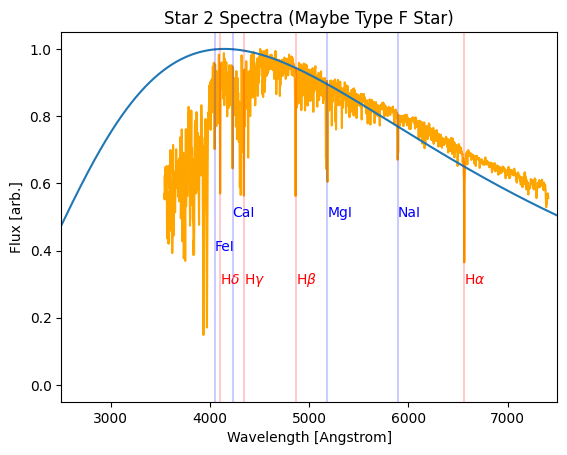

In [19]:
fig,axs = plt.subplots()
axs.plot(star2['Wavelength'],star2['Flux']/max(star2['Flux']),'orange')
plt.plot(wl,planck(wl,7000)/max(planck(wl,7000)),label = '$T_{eff} = 7000K$')
plt.axvline(x=4045.8,color='b',alpha = 0.2) # FeI absorption line 4045
plt.axvline(x=4102.1,color='r',alpha = 0.2) # h (H_delta) absorption line 4101
plt.axvline(x=4226.7,color='b',alpha = 0.2) # CaI absorption line 4226
plt.axvline(x=4340.4,color='r',alpha = 0.2) # G' (H_gamma) absorption line 4340
plt.axvline(x=4861.7,color='r',alpha = 0.2) # F (H_beta) absorption line 4861
plt.axvline(x=5183.6,color='b',alpha = 0.2) # (b1,b2,b4) MgI absorption line 5183,5172,5167
plt.axvline(x=5895,color='b',alpha = 0.2) # D1 NaI absorption line 5895
plt.axvline(x=6562.7,color='r',alpha = 0.2) # C (H_alpha) absorption line 6562
plt.text(4102.1,0.3,r'H$\delta$',color = 'r')
plt.text(4861.7,0.3,r'H$\beta$',color = 'r')
plt.text(4340.4,0.3,r'H$\gamma$',color = 'r')
plt.text(6562.,0.30,r'H$\alpha$',color = 'r')
plt.text(4045.8,0.4,"FeI",color = 'b')
plt.text(4226.7,0.5,'CaI',color = 'b')
plt.text(5183.6,0.5,'MgI',color = 'b')
plt.text(5895,0.5,'NaI',color = 'b')
axs.set_title('Star 2 Spectra (Maybe Type F Star)')
axs.set_xlabel('Wavelength [Angstrom]')
axs.set_ylabel('Flux [arb.]')
plt.xlim(2500,7500)
plt.savefig('Star2Spectra.pdf')
plt.show()

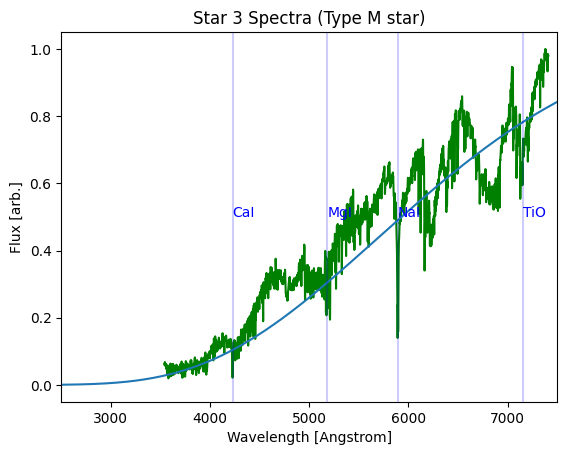

In [20]:
fig,axs = plt.subplots()
axs.plot(star3['Wavelength'],star3['Flux']/max(star3['Flux']),'green')
plt.plot(wl,planck(wl,3000)/max(planck(wl,3000)),label = '$T_{eff} = 6500K$')
plt.axvline(x=4226.7,color='b',alpha = 0.2) # CaI absorption line 4226
plt.axvline(x=5183.6,color='b',alpha = 0.2) # (b1,b2,b4) MgI absorption line 5183,5172,5167
plt.axvline(x=5895,color='b',alpha = 0.2) # D1 NaI absorption line 5895
plt.axvline(x=7150,color='b',alpha = 0.2) # TiO absorption line 7150
plt.text(4226.7,0.5,'CaI',color = 'b')
plt.text(5183.6,0.5,'MgI',color = 'b')
plt.text(5895,0.5,'NaI',color = 'b')
plt.text(7150,0.5,'TiO',color = 'b')
axs.set_title('Star 3 Spectra (Type M star)')
axs.set_xlabel('Wavelength [Angstrom]')
axs.set_ylabel('Flux [arb.]')
plt.xlim(2500,7500)
plt.savefig('Star3Spectra.pdf')
plt.show()